In [2]:
# load required R package
# 载入R包
library(ggplot2)
library(tidyverse)
library(ggpubr)

In [3]:
# load model weight
# 载入枇杷果重模型
load('04_ML//svmLinear_Model_Top_5000.Rdata')

In [4]:
# read snp genotype
# 读取需要预测的遗传变异的基因型数据
test <- read.table("test.snp",header=T,check.names=F)

In [5]:
# model prediction
# 模型预测
predictions <- predict(model, newdata = test)
results <- data.frame(Actual = (test$Weight),
                              Predicted = predictions)

`geom_smooth()` using formula = 'y ~ x'


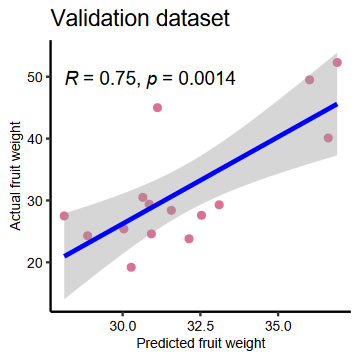

In [8]:
# correlation analysis
# 果重真实值和预测值的相关性可视化
options(repr.plot.width=3, repr.plot.height=3)
results %>%
    ggplot(aes(Predicted,Actual))+
        geom_point(color='#DB7093')+
    theme(axis.text=element_text(size=8,color='black'),
              axis.title=element_text(size=8),
              panel.background = element_blank(),
          legend.position="none",
             axis.line = element_line(colour = "black",size = 0.5))+
  stat_cor()+
  geom_smooth(method = "lm", se = TRUE,color='blue')+
xlab("Predicted fruit weight")+ylab("Actual fruit weight")+
ggtitle("Validation dataset")